# Train SVM model without genres as features

In [1]:
import pandas as pd
data = pd.read_csv('song_data_combined_genre.csv')
data = data.drop(columns=['Track Name', 'Artist', 'Genre'])
#data

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('Label',1), 
                                                    data['Label'],
                                                    test_size=0.2,
                                                    random_state=0) 

In [3]:
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

def evaluate_on_training_set(y_test, y_pred):
  # Calculate AUC
  print("AUC is: ", roc_auc_score(y_test, y_pred)) #todo print AUC score)
  
  # print out recall and precision
  print(classification_report(y_test, y_pred))
  
  # print out confusion matrix
  print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

  # # calculate points for ROC curve
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  
  # Plot ROC curve
  plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc_score(y_test, y_pred))
  plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate or (1 - Specifity)')
  plt.ylabel('True Positive Rate or (Sensitivity)')
  plt.title('Receiver Operating Characteristic')

In [4]:
from sklearn.preprocessing import MinMaxScaler

# define a new scaler: 
x_scaler = MinMaxScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train) #todo

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

C:\Users\YT\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [5]:
from sklearn.svm import SVC
model = SVC(C=10, gamma='auto', kernel='rbf')
model.fit(X_train_norm, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

AUC is:  0.8234967087706814
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       616
           1       0.78      0.89      0.83       584

   micro avg       0.82      0.82      0.82      1200
   macro avg       0.83      0.82      0.82      1200
weighted avg       0.83      0.82      0.82      1200

Confusion Matrix: 
 [[465 151]
 [ 63 521]]


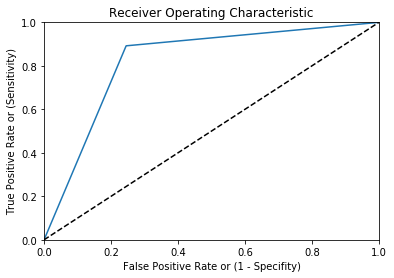

In [6]:
model.fit(X_train_norm, y_train) # Training SVM

y_pred = model.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function


# Train SVM with the use of genres as features

In [7]:
import pandas as pd
data = pd.read_csv('song_data_combined_genre_label_final.csv')
data = data.drop(columns=['Track Name', 'Artist', 'Genre'])
#data

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('Label',1), 
                                                    data['Label'],
                                                    test_size=0.2,
                                                    random_state=0) 

In [9]:
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

def evaluate_on_training_set(y_test, y_pred):
  # Calculate AUC
  print("AUC is: ", roc_auc_score(y_test, y_pred)) #todo print AUC score)
  
  # print out recall and precision
  print(classification_report(y_test, y_pred))
  
  # print out confusion matrix
  print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

  # # calculate points for ROC curve
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  
  # Plot ROC curve
  plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc_score(y_test, y_pred))
  plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate or (1 - Specifity)')
  plt.ylabel('True Positive Rate or (Sensitivity)')
  plt.title('Receiver Operating Characteristic')

In [10]:
from sklearn.preprocessing import MinMaxScaler

# define a new scaler: 
x_scaler = MinMaxScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train) #todo

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

C:\Users\YT\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [11]:
from sklearn.svm import SVC
model = SVC(C=10, gamma='auto', kernel='rbf')
model.fit(X_train_norm, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

AUC is:  0.8726983632805551
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       616
           1       0.86      0.88      0.87       584

   micro avg       0.87      0.87      0.87      1200
   macro avg       0.87      0.87      0.87      1200
weighted avg       0.87      0.87      0.87      1200

Confusion Matrix: 
 [[533  83]
 [ 70 514]]


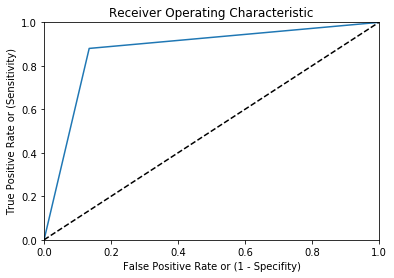

In [12]:
model.fit(X_train_norm, y_train) # Training SVM

y_pred = model.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function


## Save the better model (trained with genre as features)

In [15]:
# save the better model
import joblib 
joblib.dump(model, "svm.joblib")

['svm.joblib']

## Load the model and perform a simple prediction on the test data

In [16]:
loaded_svm = joblib.load("svm.joblib")
loaded_svm.predict(X_test_norm)

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)